<a href="https://colab.research.google.com/github/hemanth346/YoloV3_CustomData/blob/master/YOLOv3_drones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/hemanth346/YoloV3_CustomData.git


Cloning into 'YoloV3_CustomData'...
remote: Enumerating objects: 733, done.
remote: Counting objects: 100% (733/733), done.
remote: Compressing objects: 100% (719/719), done.
remote: Total 733 (delta 2), reused 733 (delta 2), pack-reused 0
Receiving objects: 100% (733/733), 9.32 MiB | 12.49 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [5]:
cd YoloV3_CustomData/

/content/YoloV3_CustomData


In [10]:
!ls -ld weights || mkdir weights && ls -ld weights

drwxr-xr-x 2 root root 4096 Apr 23 07:20 weights
drwxr-xr-x 2 root root 4096 Apr 23 07:20 weights


In [12]:
# copy weights
!ls -l weights

total 242200
-r-------- 1 root root 248007048 Nov 22 23:59 yolov3.weights


In [18]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-23 07:27:43.608936: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (293 found, 0 missing, 0 empty, 0 duplicate, for 293 images): 100% 293/293 [00:00<00:00, 6353.72it/s]
Caching images (0.1GB): 100% 293/293 [00:00<00:00, 334.35it/s]
Caching labels (32 found, 0 missing, 0 empty, 0 duplicate, for 32 images): 100% 32/32 [

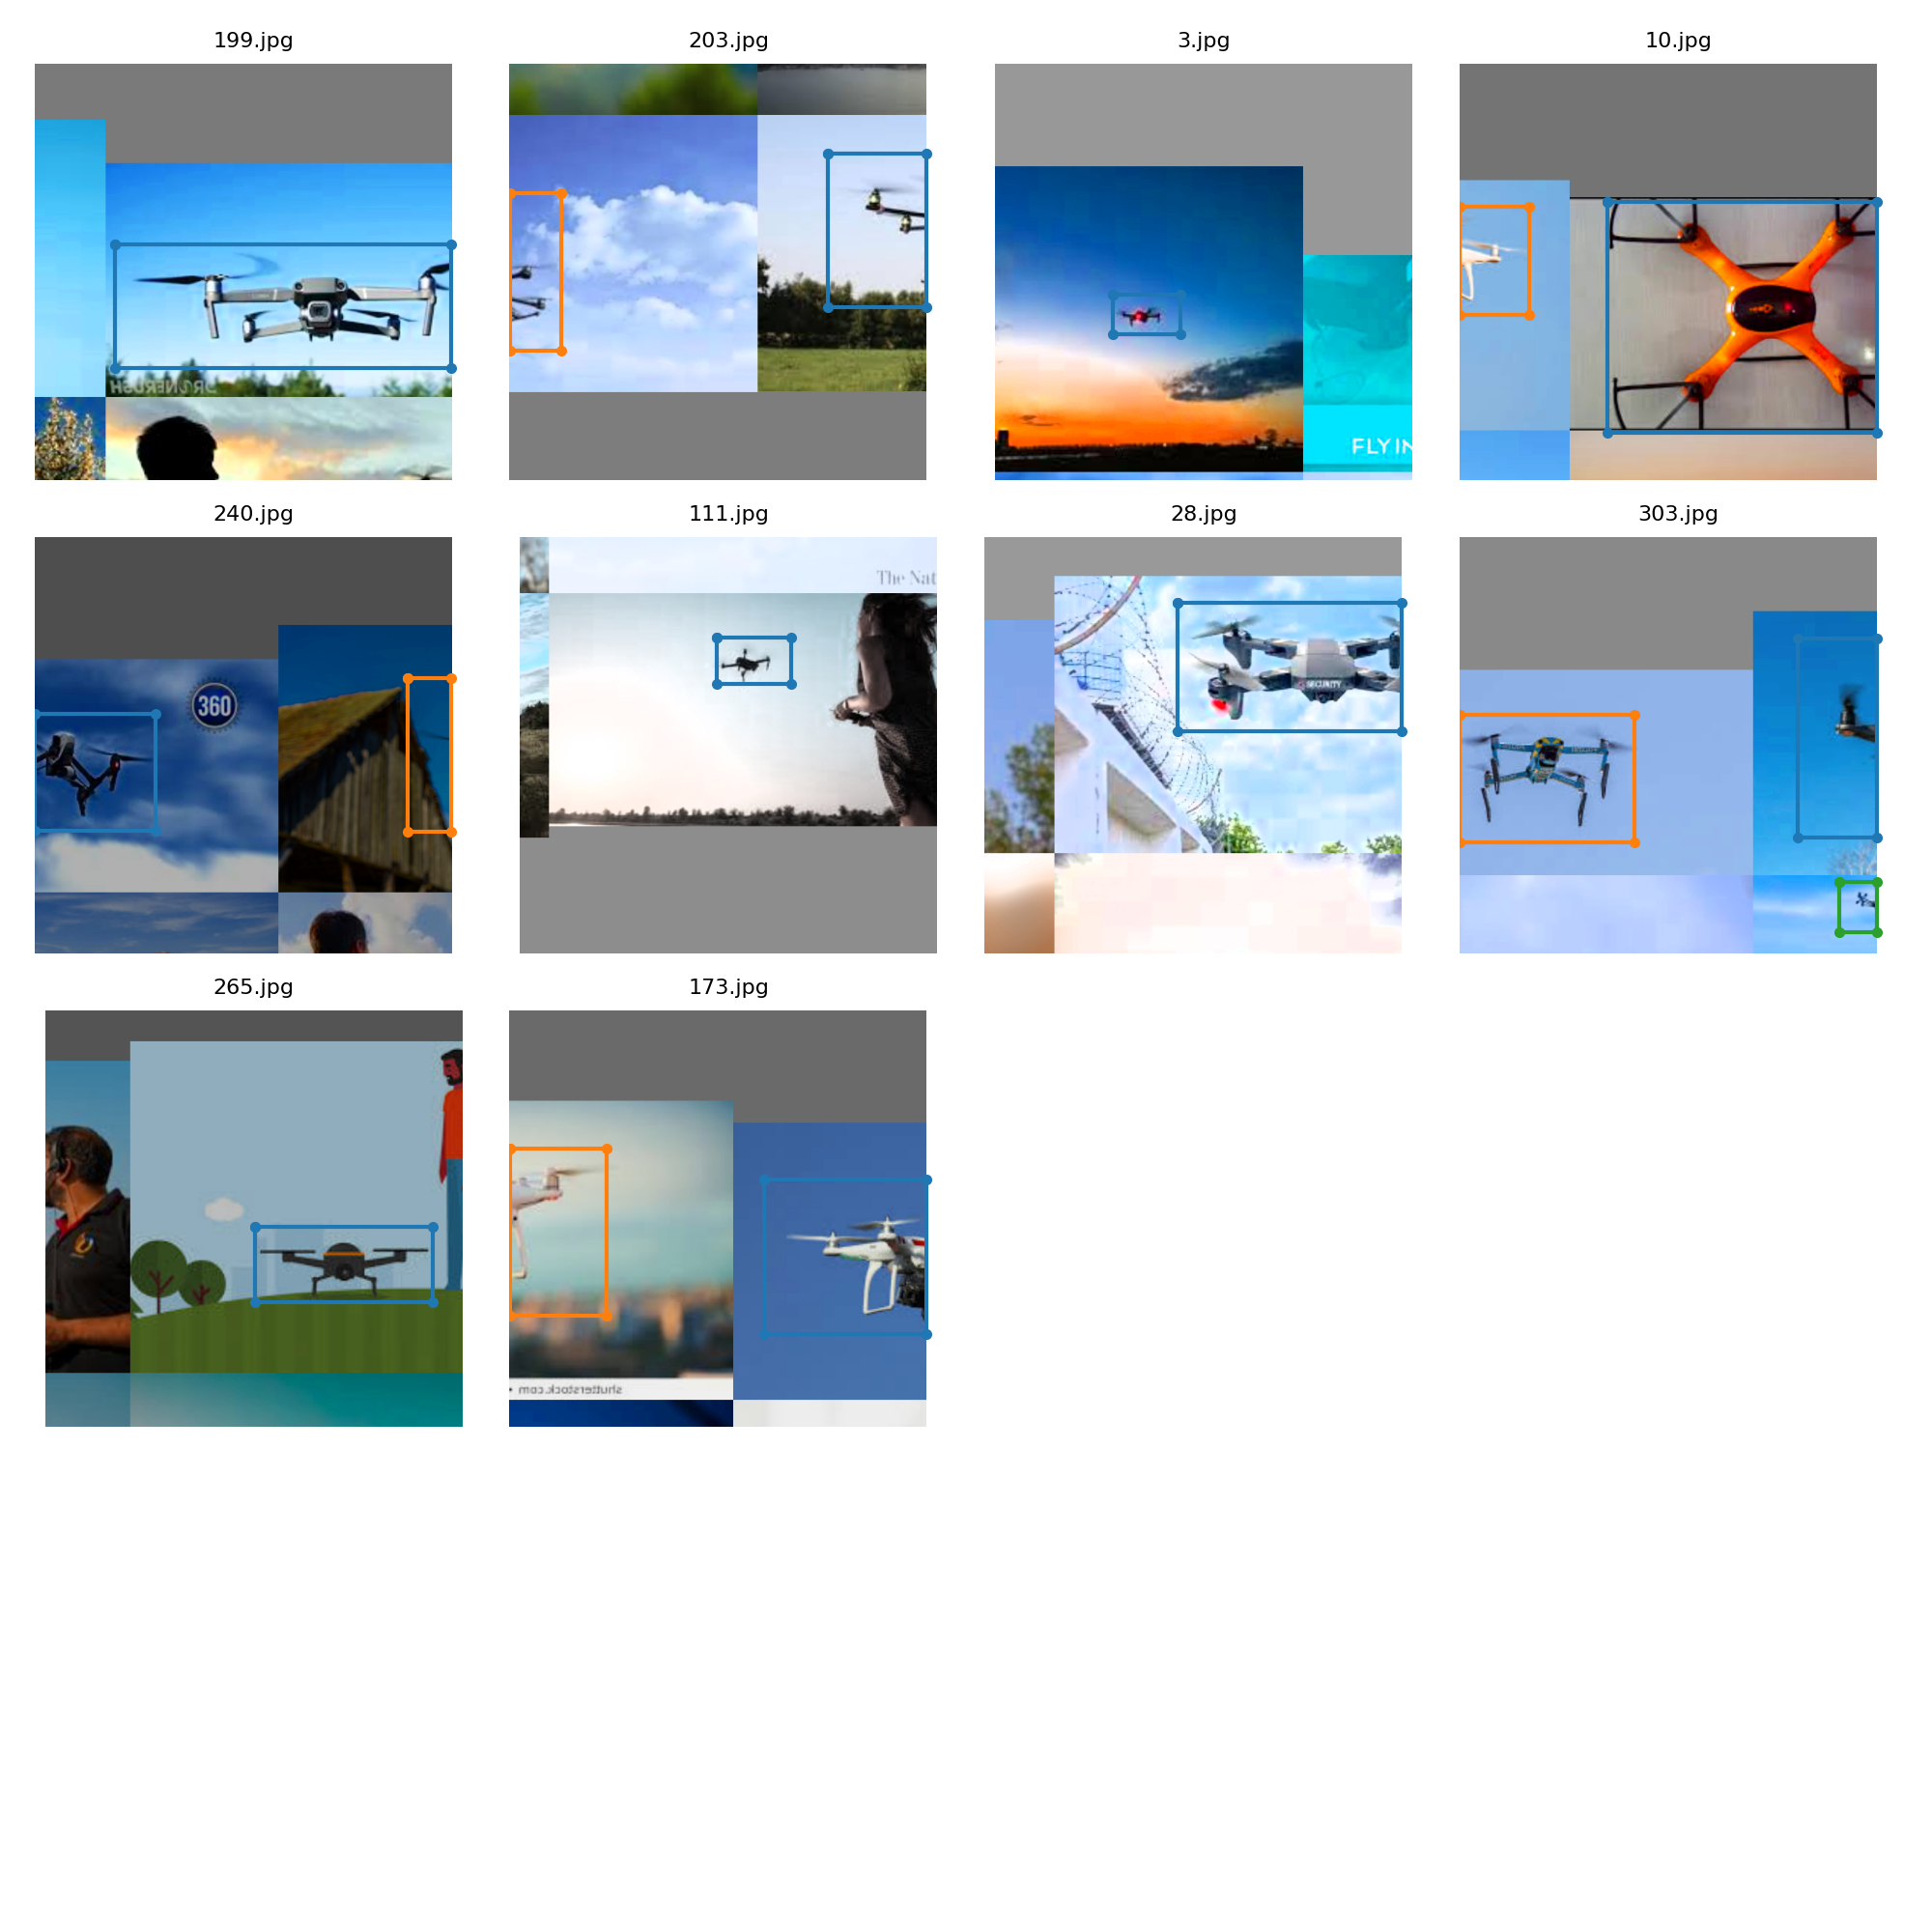

In [78]:
Image(filename='train_batch0.png')

In [19]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/325 data/customdata/images/1.jpg: 320x512 1 drones, Done. (0.019s)
image 2/325 data/customdata/images/10.jpg: 320x512 1 drones, Done. (0.016s)
image 3/325 data/customdata/images/100.jpg: 384x512 1 drones, Done. (0.020s)
image 4/325 data/customdata/images/101.jpg: 384x512 1 drones, Done. (0.025s)
image 5/325 data/customdata/images/102.jpg: 320x512 1 drones, Done. (0.020s)
image 6/325 data/customdata/images/104.jpg: 384x512 1 drones, Done. (0.019s)
image 7/325 data/customdata/images/105.jpg: 384x512 1 dr

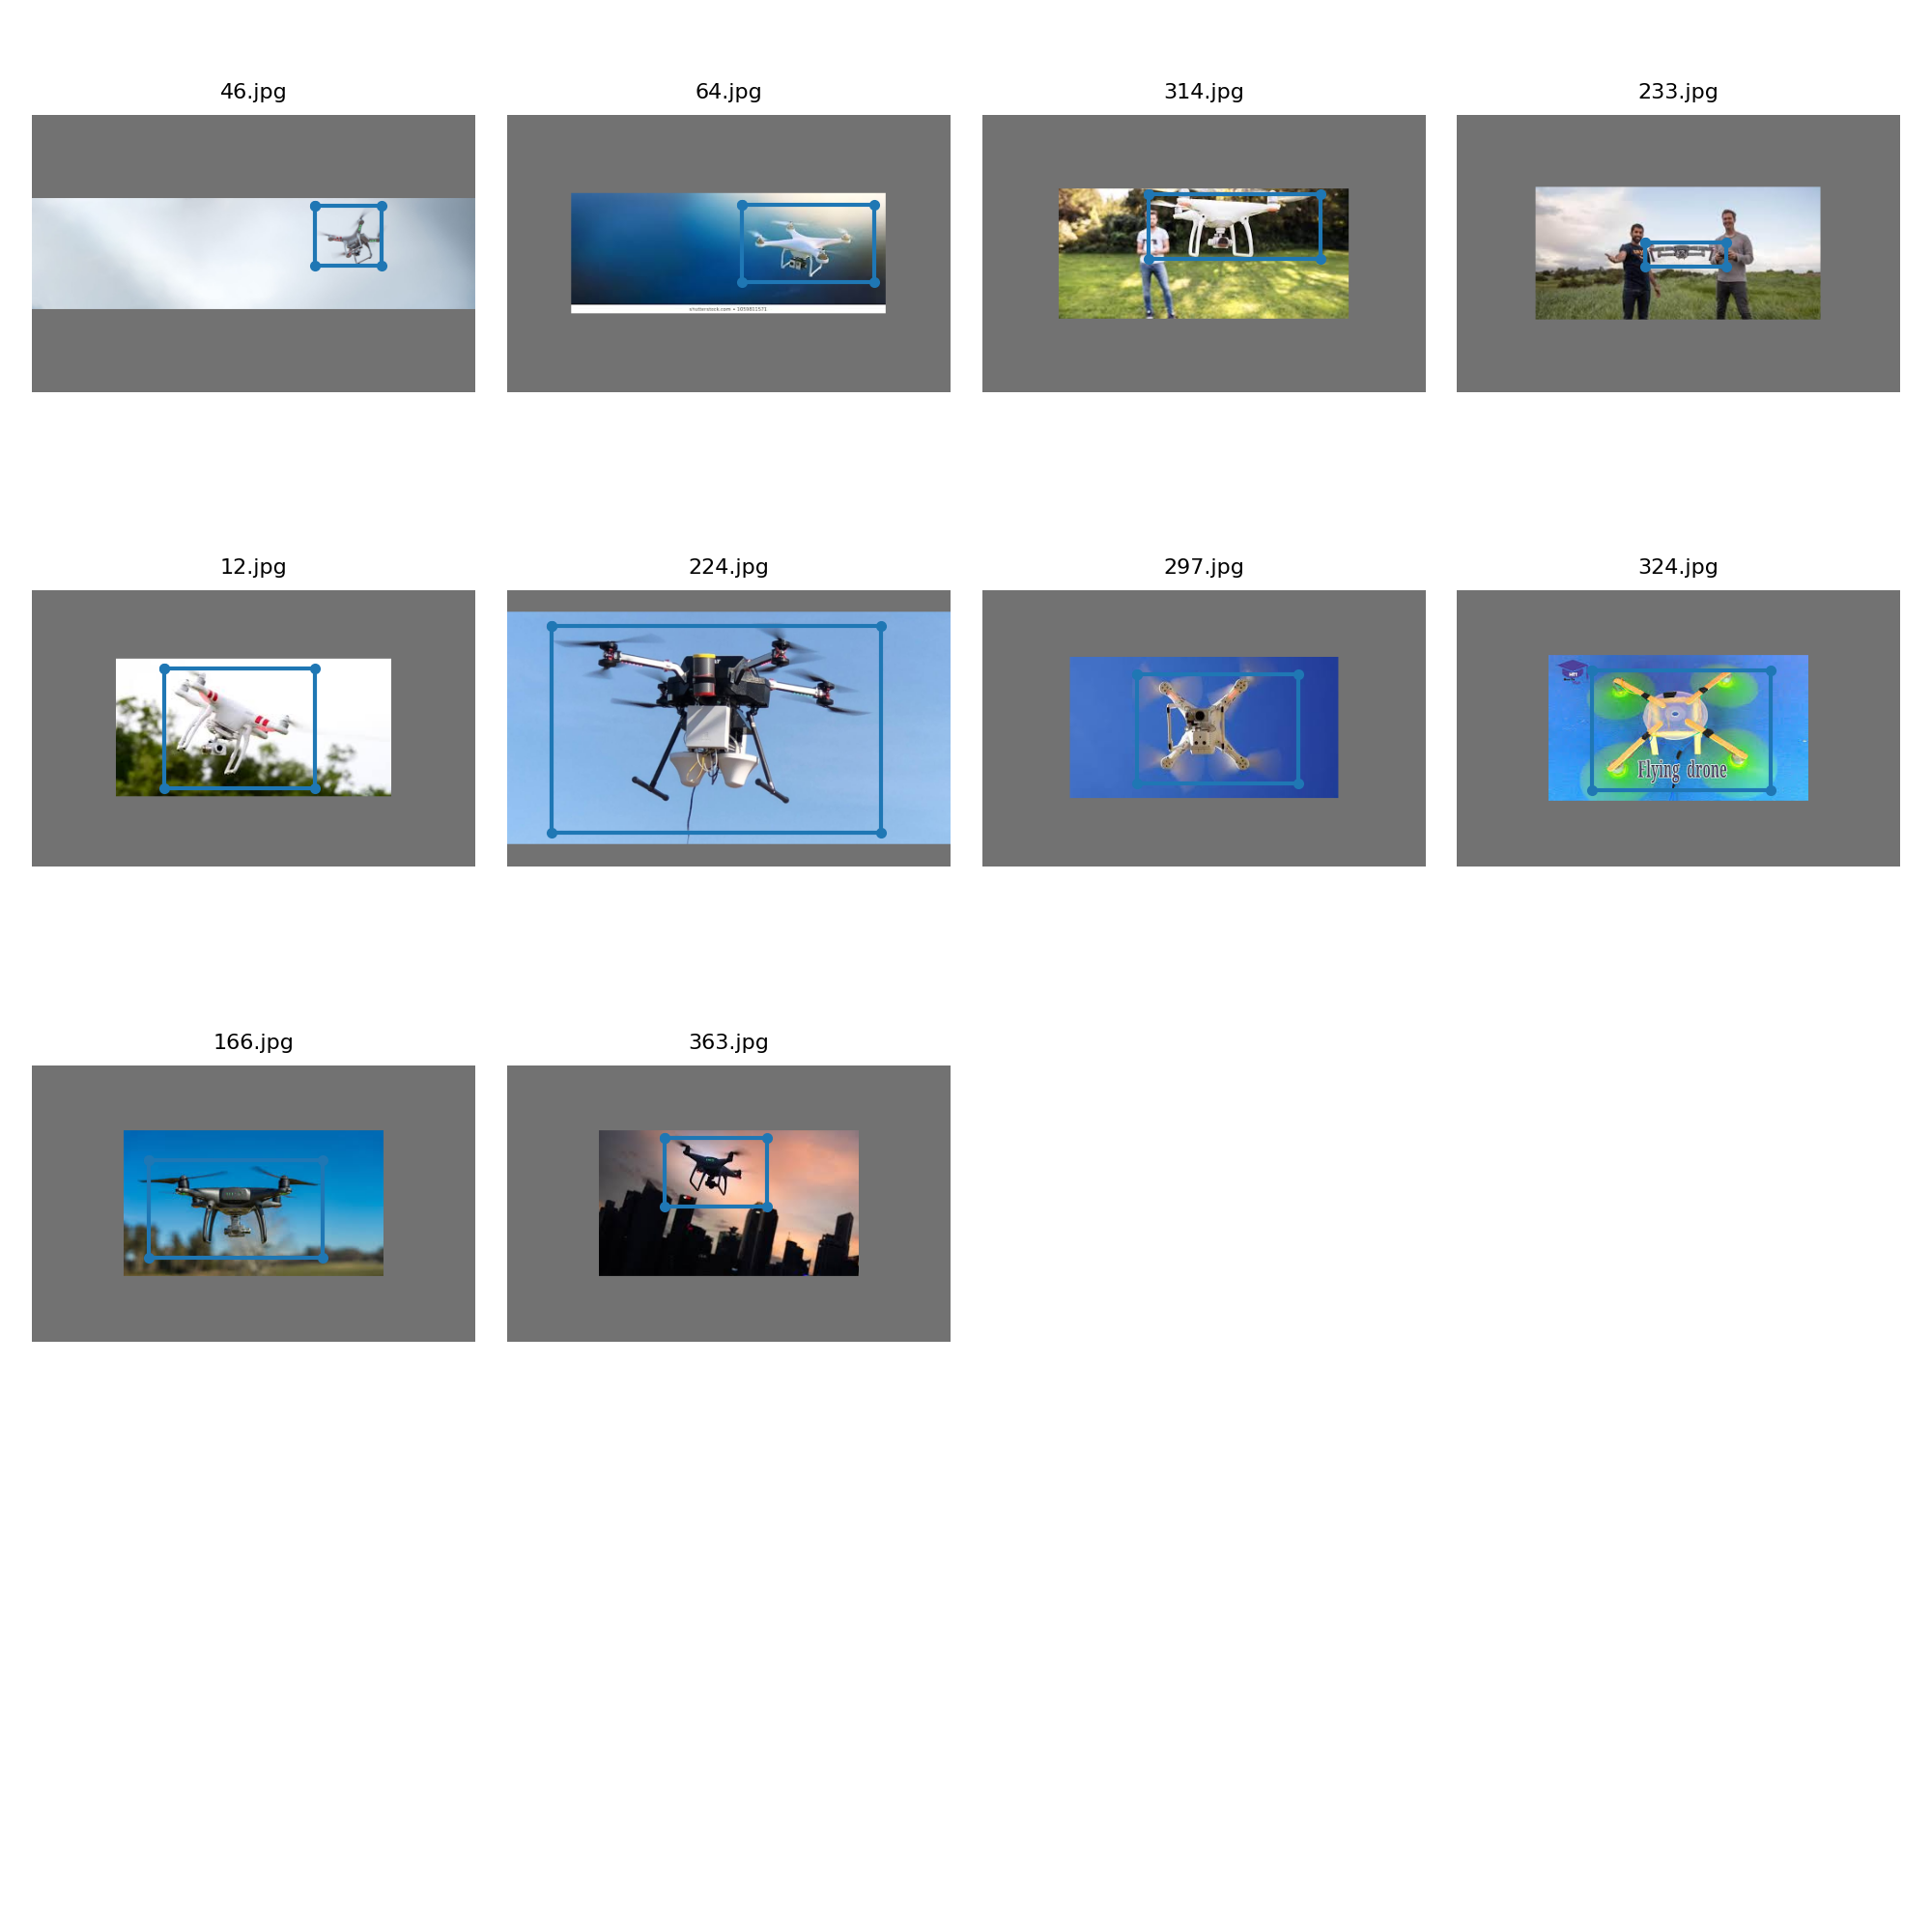

In [79]:
Image(filename='test_batch0.png')

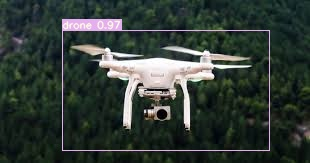

In [20]:
Image(filename='out_out/98.jpg', width=600)

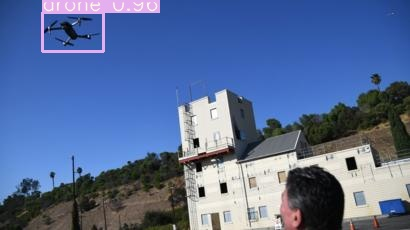

In [21]:
Image(filename='out_out/1.jpg', width=600)

In [83]:
!python detect.py --source drone_flying.mp4 --conf-thres 0.1 --output vid

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='vid', save_txt=False, source='drone_flying.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1354) drone_flying.mp4: 320x512 Done. (0.019s)
video 1/1 (2/1354) drone_flying.mp4: 320x512 Done. (0.016s)
video 1/1 (3/1354) drone_flying.mp4: 320x512 Done. (0.023s)
video 1/1 (4/1354) drone_flying.mp4: 320x512 Done. (0.018s)
video 1/1 (5/1354) drone_flying.mp4: 320x512 Done. (0.017s)
video 1/1 (6/1354) drone_flying.mp4: 320x512 Done. (0.016s)
video 1/1 (7/1354) drone_flying.mp4: 320x512 Done. (0.017s)
video 1/1 (8/1354) drone_flying.mp4: 320x512 Done. (0.018s)
video 1/1 (9/1354) drone_flying.mp4: 320x512 